<a href="https://colab.research.google.com/github/tejjusbhat/SaaS-Customer-Churn-Prediction/blob/main/Customer_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intial Cleaning and EDA
In this notebook we will clean the noise and make the data more interpretable also we will be performing EDA on this Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("churn_data.csv")
df.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,F,XW0DQ7H,Village,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,No,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,F,5K0N3X1,City,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,Yes,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,F,1F2TCL3,Town,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,Yes,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16
3,37,M,VJGJ33N,City,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,Yes,Unsolved,Poor Website,1,Basic,8,8,227,215.77,20
4,31,F,SVZXCWB,City,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,Yes,Solved,Poor Website,1,Basic,13,11,294,231.94,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   referral_id                   36992 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_session_duration          36992 non-null  float64
 13  a

**Interpretation:** There are some null values and some categorical values which we might need to sort out later

In [4]:
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_session_duration               0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn                              0
plan_tier                          0
logins_90d                         0
active_days_90d                    0
api_calls_90d                      0
session_minutes_90d                0
d

Taking care of the null values first
- Replacing the missing region category with "Unkown" to not mess with the data
- Replacing with "No Preference" as it will serve as a median value
- Assuming no points in wallet in blank ones as it could mean user did not register to the wallet system

In [5]:
# Categorical nulls
df['region_category'] = df['region_category'].fillna("Unknown")
df['preferred_offer_types'] = df['preferred_offer_types'].fillna("No Preference")

df['points_in_wallet'] = df['points_in_wallet'].fillna(0.0)

In [6]:
df.describe()

,age,days_since_last_login,avg_session_duration,avg_transaction_value,points_in_wallet,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,622.951203,0.540982,24.013057,20.428795,3223.677849,524.694113,4.312203
std,15.867412,228.819900,398.289149,19444.806226,271.996922,0.498324,12.778238,9.473876,4060.336858,345.090190,5.781831
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000,1.000000,1.000000,171.000000,5.400000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,574.135000,0.000000,14.000000,13.000000,346.000000,266.135000,1.000000
50%,37.000000,12.000000,161.765000,27554.485000,680.370000,1.000000,21.000000,19.000000,1626.000000,432.570000,2.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,1.000000,32.000000,27.000000,2967.000000,707.270000,6.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000,75.000000,54.000000,18776.000000,2192.280000,78.000000


Now there is some weird things to note here


1.   The negative values in the days_since_last_login, avg_session_duration and points in wallet columns
2.   The age being 10 at the minimum, but lets assume for our case the product is geared towards younger audiences as well so as to not lose any data



In [7]:
# Days since last login: negative means placeholder
df.loc[df['days_since_last_login'] < 0, 'days_since_last_login'] = np.nan
df['days_since_last_login'] = df['days_since_last_login'].fillna(df['days_since_last_login'].median())

# Average session duration: negative means error
df.loc[df['avg_session_duration'] < 0, 'avg_session_duration'] = np.nan
df['avg_session_duration'] = df['avg_session_duration'].fillna(df['avg_session_duration'].median())

# Points in wallet: large negatives = invalid
df.loc[df['points_in_wallet'] < 0, 'points_in_wallet'] = np.nan
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].median())

In [8]:
df.describe()

,age,days_since_last_login,avg_session_duration,avg_transaction_value,points_in_wallet,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.771599,287.241508,29271.194003,626.066134,0.540982,24.013057,20.428795,3223.677849,524.694113,4.312203
std,15.867412,5.420212,325.101281,19444.806226,267.617134,0.498324,12.778238,9.473876,4060.336858,345.090190,5.781831
min,10.000000,1.000000,1.837399,800.460000,0.000000,0.000000,1.000000,1.000000,171.000000,5.400000,0.000000
25%,23.000000,9.000000,75.620000,14177.540000,577.695000,0.000000,14.000000,13.000000,346.000000,266.135000,1.000000
50%,37.000000,13.000000,174.180000,27554.485000,681.010000,1.000000,21.000000,19.000000,1626.000000,432.570000,2.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,1.000000,32.000000,27.000000,2967.000000,707.270000,6.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000,75.000000,54.000000,18776.000000,2192.280000,78.000000


## Performing Univariate Analysis
Through this we can better understand our data and also shows us many things such as:

- Skews -> that can be log transformed
- Wide value range -> normalization or binning
- Ordinal categories -> mapping to integers

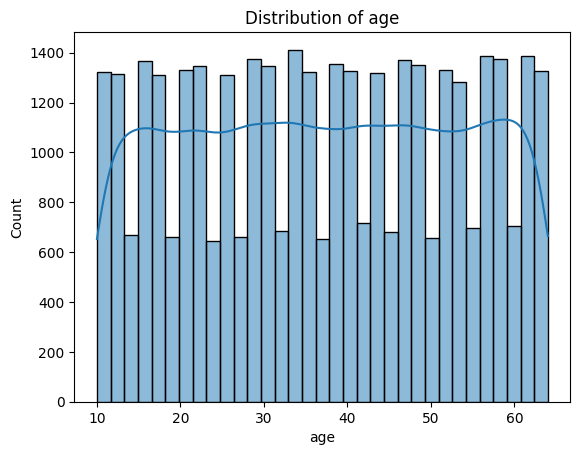

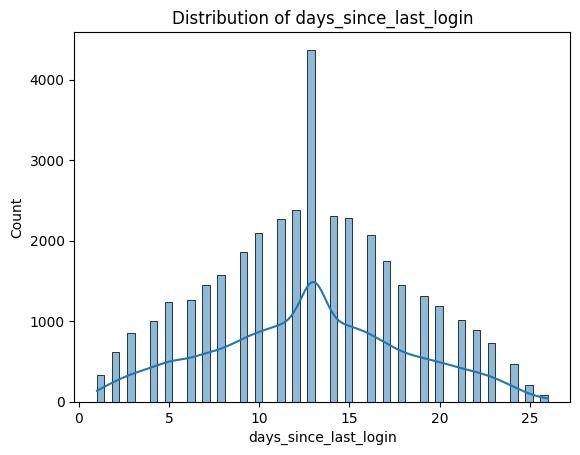

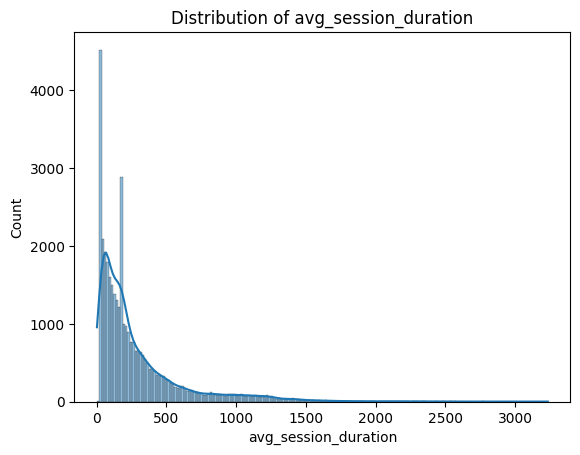

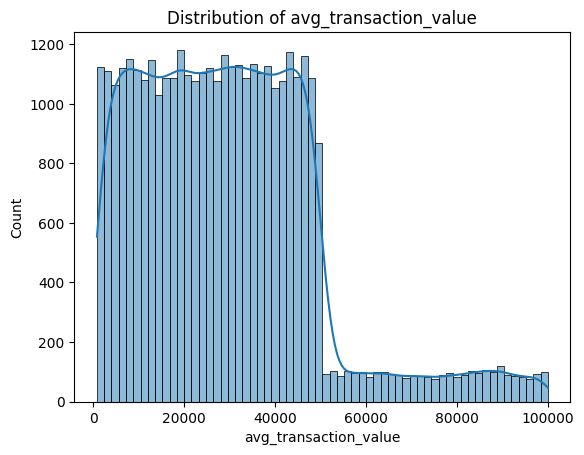

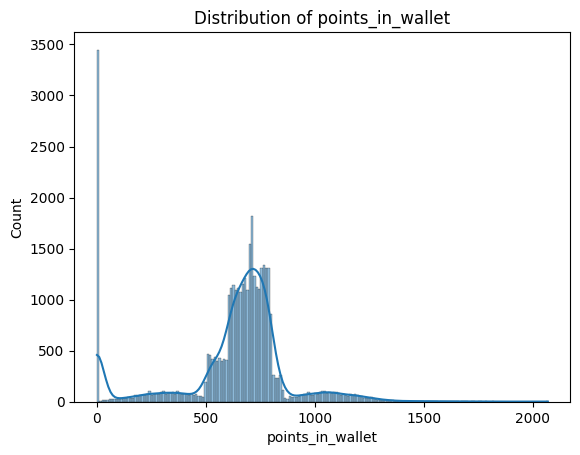

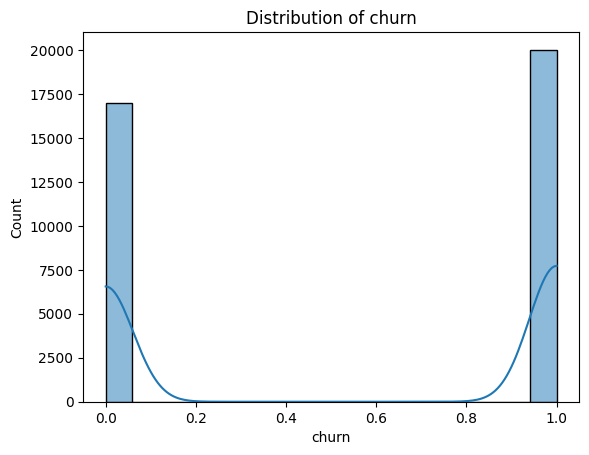

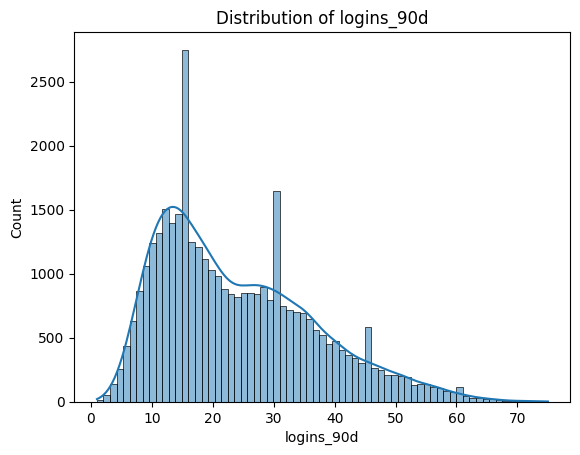

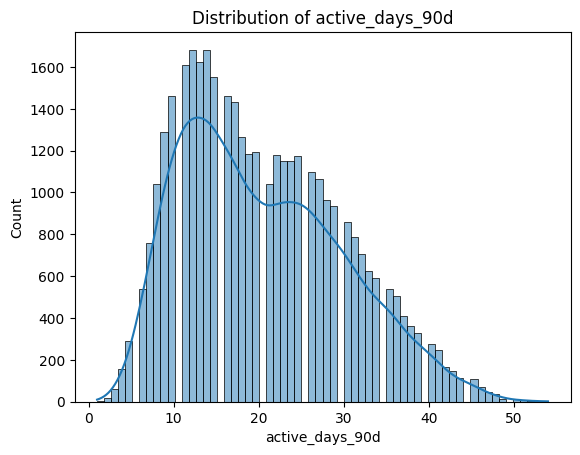

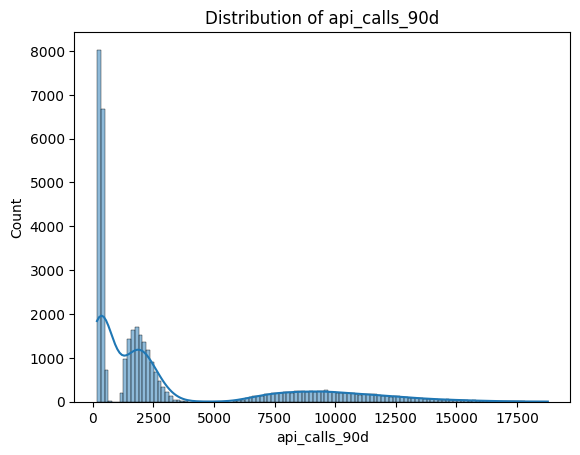

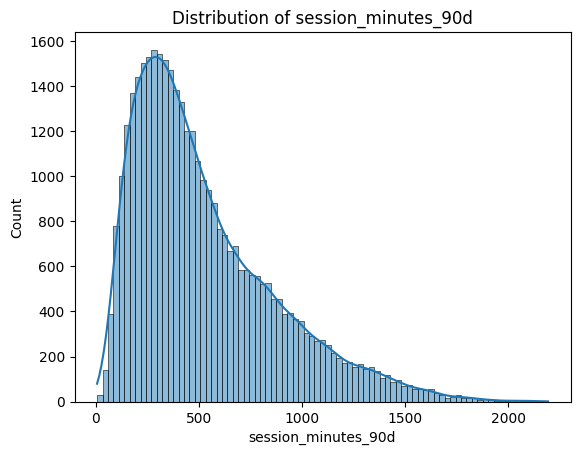

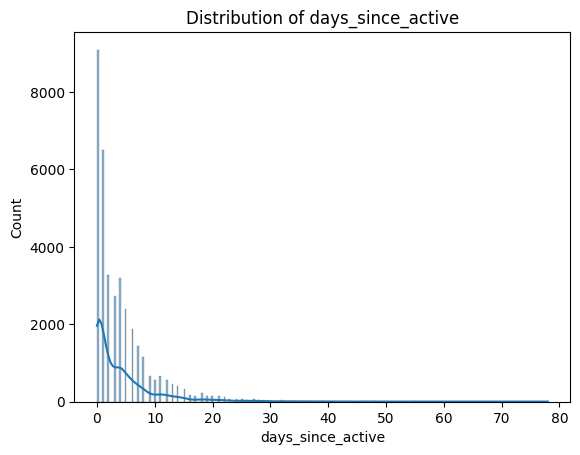

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

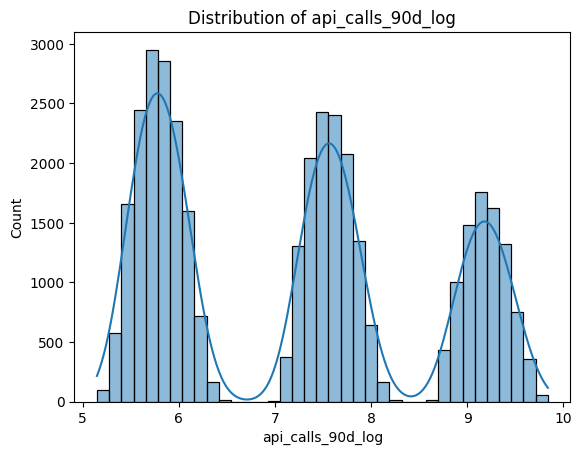

In [12]:
df['api_calls_90d_log'] = np.log1p(df['api_calls_90d'])
sns.histplot(df["api_calls_90d_log"], kde=True)
plt.title(f'Distribution of api_calls_90d_log')
plt.show()

The skew in API calls looked weird so I log transformed it. Turns out the users are divided into 3 distinct sections based on usage rates.

There could be a relation between the usage rates and the plan tier of the user

<Axes: xlabel='api_calls_90d_log', ylabel='Count'>

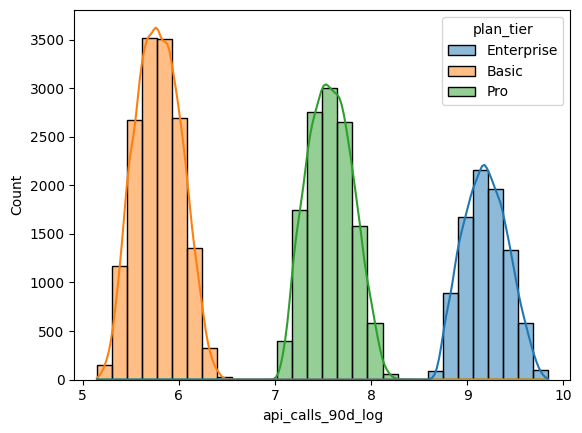

In [13]:
sns.histplot(data=df, x='api_calls_90d_log', hue='plan_tier', kde=True, bins=30)

The hypothesis was right, there is a relation and it is the cause behind the distinct categories of users

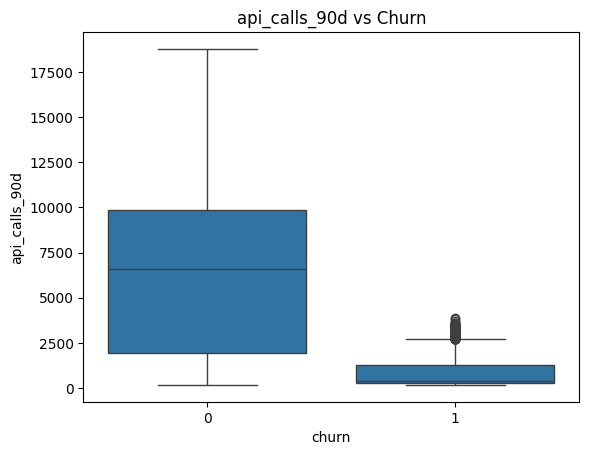

In [14]:
sns.boxplot(x='churn', y="api_calls_90d", data=df)
plt.title('api_calls_90d vs Churn')
plt.show()

## Bivariate Analysis
This graph between API calls and Churn shows us that users who are heavily using the API are less likely to churn

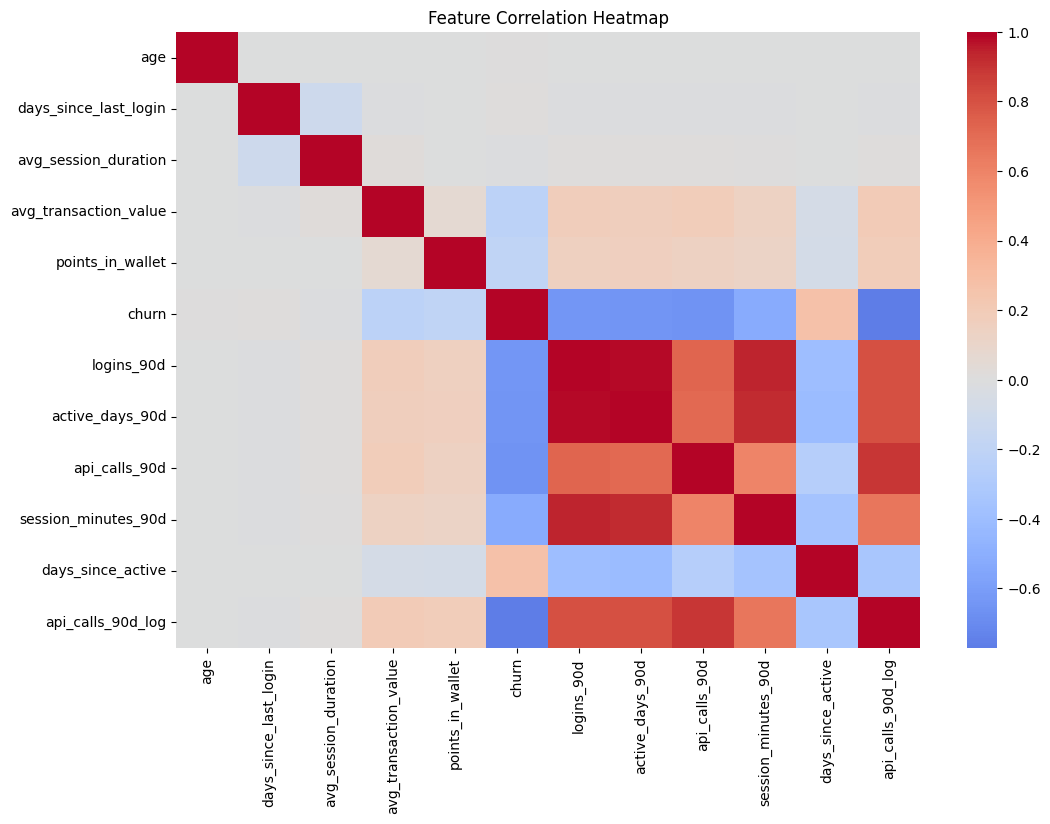

churn                    1.000000
days_since_active        0.273094
days_since_last_login    0.016382
age                      0.006124
avg_session_duration    -0.012481
points_in_wallet        -0.199464
avg_transaction_value   -0.218012
session_minutes_90d     -0.524295
logins_90d              -0.643144
active_days_90d         -0.647458
api_calls_90d           -0.659219
api_calls_90d_log       -0.771298
Name: churn, dtype: float64


In [15]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

print(corr['churn'].sort_values(ascending=False))

From the Heatmap we can find the columns that are directly or inversely related to churn

## Diving the data into buckets for interpretability

In [16]:
df['api_usage_bucket'] = pd.qcut(df['api_calls_90d'], q=3, labels=['Low','Medium','High'])
df['recency_bucket'] = pd.cut(df['days_since_active'], bins=[-1,7,30,90], labels=['0-7 days','8-30 days','31-90 days'])


Performing feature engineering so that we can have some more information from the existing columns

In [17]:
df['logins_per_active_day'] = df['logins_90d'] / (df['active_days_90d'] + 1)
df['minutes_per_login'] = df['session_minutes_90d'] / (df['logins_90d'] + 1)
df['usage_intensity'] = (df['api_calls_90d'] / 90) / (df['days_since_active'] + 1)

## Cleaning some of the categorical values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           36992 non-null  int64   
 1   gender                        36992 non-null  object  
 2   security_no                   36992 non-null  object  
 3   region_category               36992 non-null  object  
 4   joining_date                  36992 non-null  object  
 5   joined_through_referral       36992 non-null  object  
 6   referral_id                   36992 non-null  object  
 7   preferred_offer_types         36992 non-null  object  
 8   medium_of_operation           36992 non-null  object  
 9   internet_option               36992 non-null  object  
 10  last_visit_time               36992 non-null  object  
 11  days_since_last_login         36992 non-null  float64 
 12  avg_session_duration          36992 non-null  

In [19]:
df = df.drop(columns=['referral_id'])


In [20]:
# Joining date → tenure in days
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')
df['tenure_days'] = (pd.Timestamp.today() - df['joining_date']).dt.days

# Last visit time → hour of day
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S', errors='coerce')
df['last_visit_hour'] = df['last_visit_time'].dt.hour

# Drop original date/time columns
df = df.drop(columns=['joining_date', 'last_visit_time'])

/tmp/ipykernel_27222/1957242444.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')


In [21]:
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

In [22]:
recency_map = {'0-7 days': 0, '8-30 days': 1, '31-90 days': 2}
df['recency_bucket'] = df['recency_bucket'].map(recency_map)

In [23]:
api_usage_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['api_usage_bucket'] = df['api_usage_bucket'].map(api_usage_map)


In [24]:
df.to_csv("saas_churn_clean.csv", index=False)
print("Dataset saved: saas_churn_clean.csv")

Dataset saved: saas_churn_clean.csv
